# ***Primera red neuronal con Keras (MNIST dataset)***

In [4]:
# Importación de librerías necesarias
from keras.datasets   import mnist
from keras            import layers, models
from keras.utils      import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Dataset
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [13]:
# Shapes
print('Train data shape\t\t:',train_data.shape)
print('Train data instance shape\t:', train_data[0].shape)
print('Train label shape\t\t:', train_labels.shape)
print('Train label instance shape\t:', train_labels[0].shape)
print('Test data shape\t\t\t:', test_data.shape)
print('Test data instance shape\t:', test_data[0].shape)
print('Test label shape\t\t:', test_labels.shape)
print('Test label instance shape\t:', test_labels[0].shape)

Train data shape		: (60000, 28, 28)
Train data instance shape	: (28, 28)
Train label shape		: (60000,)
Train label instance shape	: ()
Test data shape			: (10000, 28, 28)
Test data instance shape	: (28, 28)
Test label shape		: (10000,)
Test label instance shape	: ()


5


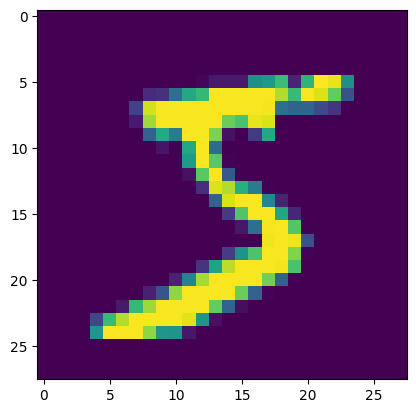

In [26]:
# Primera instancia del train_data
plt.imshow(train_data[0])
plt.savefig("numero_Primera_red_neuronal_con_Keras_train_data_0.png")
print(train_labels[0])

In [34]:
# Clase de la instancia train_data[0]
print('Class of train_dada instance[0]:',train_labels[0])

Class of train_dada instance[0]: 5


7


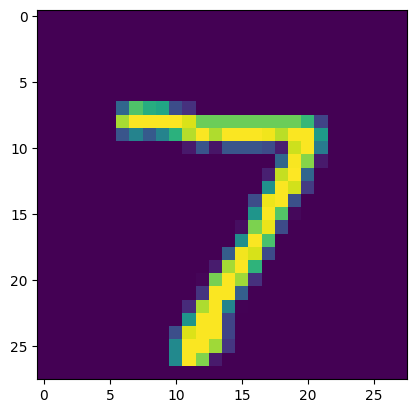

In [28]:
# Primera instancia del test_data
plt.imshow(test_data[0])
plt.savefig("numero_Primera_red_neuronal_con_Keras_test_data_0.png")
print(test_labels[0])

In [35]:
# Clase de la instancia test_data[0]
print('Class of test_dada instance[0]:',test_labels[0])

Class of test_dada instance[0]: 7


9


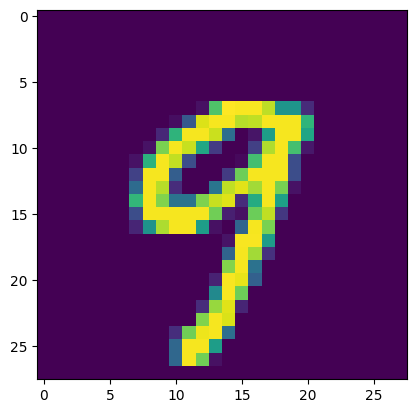

In [36]:
# Instancia 45 del train_data
plt.imshow(train_data[45])
plt.savefig("numero_Primera_red_neuronal_con_Keras_train_data_45.png")
print(train_labels[45])

In [37]:
# Clase de la instancia train_data[45]
print('Class of train_dada instance[45]:',train_labels[45])

Class of train_dada instance[45]: 9


5


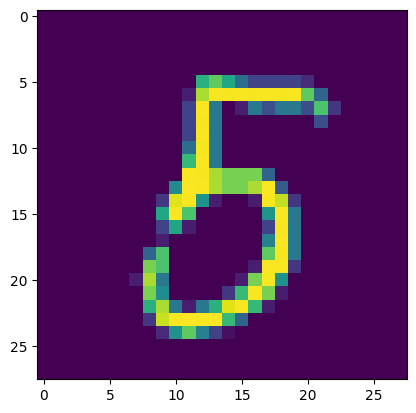

In [38]:
# Instancia 45 del test_data
plt.imshow(test_data[45])
plt.savefig("numero_Primera_red_neuronal_con_Keras_test_data_45.png")
print(test_labels[45])

In [39]:
# Clase de la instancia test_data[45]
print('Class of test_dada instance[45]:',test_labels[45])

Class of test_dada instance[45]: 5


# Modelo de datos

In [40]:
# Arquitectura del modelo de DL para la clasificación de los números decimales
#   Funciones de activación ReLu y SotfMax
model = models.Sequential()
model.add(layers.Dense(512, activation="relu", input_shape=(28*28, )))
model.add(layers.Dense(10, activation="softmax"))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [44]:
# Compilación del modelo
#   optimizer = distribución de pesos y bias (sesgos) en las neuronas
#   loss      = lo cerca o no, que estamos del objetivo a optimizar
#   metrics   = rendimiento de la red (train & test)
model.compile(optimizer ='rmsprop',
              loss      ='categorical_crossentropy',
              metrics   =['accuracy'])

# Limpieza de datos

In [50]:
# Limpieza de datos
#   Un píxel tiene de 0 a 255 en escala de grises
#   si dividimos por 255 cada pixel será un decimal, entre 0 y 1
x_train = train_data.reshape((60000,28*28))
x_train = x_train.astype('float32')/255

x_test = test_data.reshape((10000,28*28))
x_test = x_test.astype('float32')/255

print(x_train[0].shape)

(784,)


In [46]:
# Transformación de las clases en categorías
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [47]:
# Clase de la primera instancia
train_labels[0]

5

In [48]:
# Primera instancia (de 0 a 1)
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [51]:
# Resumen de la configuración del modelo
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

Resumen de la configuración del modelo
 None


# Entrenamiento del modelo

In [52]:
# Entrenar la red neuronal
model.fit(x_train, y_train, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8776 - loss: 0.4335
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9662 - loss: 0.1158
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9794 - loss: 0.0702
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9841 - loss: 0.0508
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9890 - loss: 0.0392


# Evaluación sobre dataset de test

In [ ]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9771 - loss: 0.0774


[0.06409934163093567, 0.9801999926567078]